# Importing Libraries and Reading Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set the directory
input_dir = os.path.dirname(os.getcwd())+os.sep+"Input_Dataset"
output_dir = os.path.dirname(os.getcwd())+os.sep+"Output_Dataset"

# Load the data
train_df = pd.read_csv(input_dir+os.sep+"Train.csv")
test_df = pd.read_csv(input_dir+os.sep+"Test.csv")
sample_submission = pd.read_csv(input_dir+os.sep+"Submission.csv")  

# Exploratory Data Analysis

In [22]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555
1,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525
2,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772
3,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031
4,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928


In [23]:
train_df.dtypes

Holiday               float64
Temperature           float64
Rainfall_last_hour    float64
Snowfall_last_hour    float64
Cloud_Cover             int64
Weather                object
Weather_Desc           object
TimeStamp              object
Date                   object
Traffic_Vol             int64
dtype: object

## Treating null values

In [24]:
train_df.isnull().sum()

Holiday               38323
Temperature               0
Rainfall_last_hour        0
Snowfall_last_hour        0
Cloud_Cover               0
Weather                   0
Weather_Desc              0
TimeStamp                 0
Date                      0
Traffic_Vol               0
dtype: int64

## Imputing Holiday column as 0

In [25]:
train_df["Holiday"] = train_df["Holiday"].fillna(0)
test_df["Holiday"] = test_df["Holiday"].fillna(0)

## Converting Timestamp into date time to import day based features

In [26]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08 9:00,02/10/08,5555
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 10:00,02/10/08,4525
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 11:00,02/10/08,4772
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08 12:00,02/10/08,5031
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08 13:00,02/10/08,4928


In [27]:
train_df["TimeStamp"] = pd.to_datetime(train_df["TimeStamp"])
test_df["TimeStamp"] = pd.to_datetime(test_df["TimeStamp"])

C:\Users\INNODVOH\AppData\Local\Temp\ipykernel_21508\3063770804.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df["TimeStamp"] = pd.to_datetime(train_df["TimeStamp"])
C:\Users\INNODVOH\AppData\Local\Temp\ipykernel_21508\3063770804.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df["TimeStamp"] = pd.to_datetime(test_df["TimeStamp"])


In [28]:
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,2008-02-10 09:00:00,02/10/08,5555
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 10:00:00,02/10/08,4525
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 11:00:00,02/10/08,4772
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 12:00:00,02/10/08,5031
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 13:00:00,02/10/08,4928


# Feature Engineering 

## Adding Date Time Features

In [29]:
def add_day_features(df):
    # Extract day of the week
    df['DayOfWeek'] = df['TimeStamp'].dt.dayofweek
    # Classify as weekday or weekend
    df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
    return df

def add_hour_feature(df):
    # Extract hour of the day
    df['HourOfDay'] = df['TimeStamp'].dt.hour
    return df

def add_date_features(df):
    # Extract year, month, and day
    df['Year'] = df['TimeStamp'].dt.year
    df['Month'] = df['TimeStamp'].dt.month
    df['Day'] = df['TimeStamp'].dt.day
    return df

# Apply the function to train and test dataframes
train_df = add_date_features(train_df)
test_df = add_date_features(test_df)

# Apply the function to train and test dataframes
train_df = add_hour_feature(train_df)
test_df = add_hour_feature(test_df)

# Apply the function to train and test dataframes
train_df = add_day_features(train_df)
test_df = add_day_features(test_df)

# Display the updated dataframe
train_df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,TimeStamp,Date,Traffic_Vol,Year,Month,Day,HourOfDay,DayOfWeek,IsWeekend
0,0.0,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,2008-02-10 09:00:00,02/10/08,5555,2008,2,10,9,6,1
1,0.0,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 10:00:00,02/10/08,4525,2008,2,10,10,6,1
2,0.0,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 11:00:00,02/10/08,4772,2008,2,10,11,6,1
3,0.0,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10 12:00:00,02/10/08,5031,2008,2,10,12,6,1
4,0.0,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10 13:00:00,02/10/08,4928,2008,2,10,13,6,1


In [30]:
# cat_cols = ['Month', 'Day', 'DayOfWeek', 'HourOfDay', 'IsWeekend','Holiday']

# for col in cat_cols:
#     train_df[col] = train_df[col].astype('category')
#     test_df[col] = test_df[col].astype('category')

In [31]:
train_df.dtypes

Holiday                      float64
Temperature                  float64
Rainfall_last_hour           float64
Snowfall_last_hour           float64
Cloud_Cover                    int64
Weather                       object
Weather_Desc                  object
TimeStamp             datetime64[ns]
Date                          object
Traffic_Vol                    int64
Year                           int32
Month                          int32
Day                            int32
HourOfDay                      int32
DayOfWeek                      int32
IsWeekend                      int64
dtype: object

In [32]:
train_df.shape,test_df.shape

((38373, 16), (2208, 16))

# Time Series Modelling 

## Coint Johnsen test for Stationarity

In [33]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [34]:
train_df.dtypes

Holiday                      float64
Temperature                  float64
Rainfall_last_hour           float64
Snowfall_last_hour           float64
Cloud_Cover                    int64
Weather                       object
Weather_Desc                  object
TimeStamp             datetime64[ns]
Date                          object
Traffic_Vol                    int64
Year                           int32
Month                          int32
Day                            int32
HourOfDay                      int32
DayOfWeek                      int32
IsWeekend                      int64
dtype: object

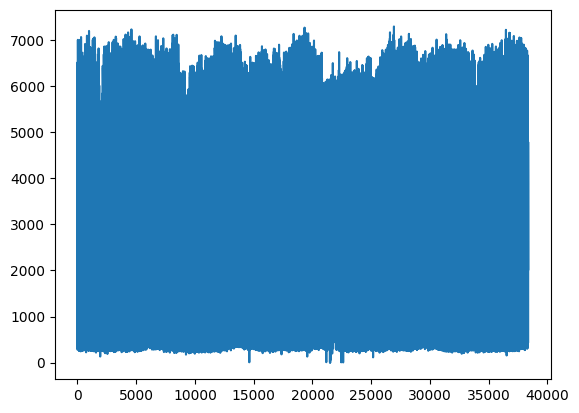

In [35]:
plt.plot(train_df['Traffic_Vol'])
plt.show()

## Looks Stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(train_df['Traffic_Vol'])

# Extract and display the test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -26.016207630616517
p-value: 0.0
Critical Values:
   1%: -3.4305206656779546
   5%: -2.8616154302179275
   10%: -2.5668101490985067


In [38]:
train_df.dtypes

Holiday                      float64
Temperature                  float64
Rainfall_last_hour           float64
Snowfall_last_hour           float64
Cloud_Cover                    int64
Weather                       object
Weather_Desc                  object
TimeStamp             datetime64[ns]
Date                          object
Traffic_Vol                    int64
Year                           int32
Month                          int32
Day                            int32
HourOfDay                      int32
DayOfWeek                      int32
IsWeekend                      int64
dtype: object

# Splitting into train and validation

In [43]:
split_ratio = 0.9
train_df_split = train_df[:int(split_ratio*len(train_df))]
val_df = train_df[int(split_ratio*len(train_df)):]  
train_df_split.shape,val_df.shape

((34535, 16), (3838, 16))

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 22, Nov, 2024
Time:                     13:02:08
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -2.02451
Nobs:                     34520.0    HQIC:                  -2.38669
Log likelihood:          -541490.    FPE:                  0.0776037
AIC:                     -2.55614    Det(Omega_mle):       0.0728833
--------------------------------------------------------------------
Results for equation Traffic_Vol
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                      11965.639661      3855.056582            3.104           0.002
L1.Traffic_Vol                 1.103944         0.005388          204.879           0.000
L1.Temperature    

C:\Users\INNODVOH\AppData\Local\Temp\ipykernel_21508\202660662.py:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=train_df_split['TimeStamp'].iloc[-1], periods=val_var_df.shape[0], freq='H'), columns=var_cols)


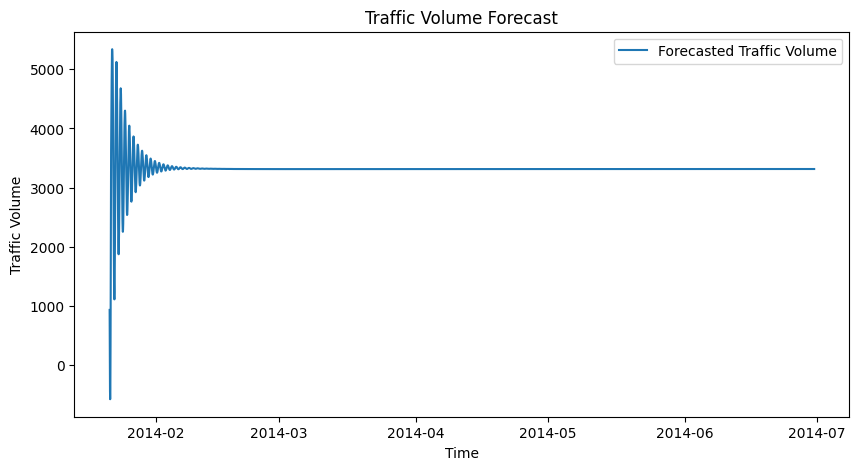

In [ ]:
from statsmodels.tsa.api import VAR

# Select the columns to include in the VAR model
var_cols = ['Traffic_Vol', 'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover', 'Holiday','Day','Year','Month','DayOfWeek','HourOfDay','IsWeekend']

# Prepare the data for the VAR model
train_var_df = train_df_split[var_cols]
val_var_df = val_df[var_cols]


# Fit the VAR model
model = VAR(train_var_df)
var_model = model.fit(maxlags=2, ic='aic')

# Print the summary of the model
print(var_model.summary())

# Forecast the next 10 steps
forecast = var_model.forecast(val_var_df.values[-var_model.k_ar:], steps=val_var_df.shape[0])

# Convert the forecast to a DataFrame
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=train_df_split['TimeStamp'].iloc[-1], periods=val_var_df.shape[0], freq='H'), columns=var_cols)

# Display the forecast
print(forecast_df)
# Plot the forecasted traffic volume
plt.figure(figsize=(10, 5))
plt.plot(forecast_df['Traffic_Vol'], label='Forecasted Traffic Volume')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Traffic Volume Forecast')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.api import VAR

# Select the columns to include in the VAR model
var_cols = ['Traffic_Vol', 'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover']

# Prepare the data for the VAR model
train_var_df = train_df[var_cols]

# Fit the VAR model
model = VAR(train_var_df)
var_model = model.fit(maxlags=15, ic='aic')

# Print the summary of the model
print(var_model.summary())

# Forecast the next 10 steps
forecast = var_model.forecast(train_var_df.values[-var_model.k_ar:], steps=10)

# Convert the forecast to a DataFrame
forecast_df = pd.DataFrame(forecast, index=pd.date_range(start=train_df['TimeStamp'].iloc[-1], periods=10, freq='H'), columns=var_cols)

# Display the forecast
print(forecast_df)

# Modelling Start

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

def preprocess_data(df):
    # Define numerical and categorical columns
    num_cols = ['Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover']
    cat_cols = ['Month', 'Day', 'DayOfWeek', 'HourOfDay', 'IsWeekend', 'Holiday', 'Weather', 'Weather_Desc']
    
    # Preprocessing for numerical data
    num_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # Preprocessing for categorical data
    cat_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ])
    
    # Apply transformations
    df_preprocessed = preprocessor.fit_transform(df)
    
    return df_preprocessed,preprocessor

num_cols = ['Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour', 'Cloud_Cover']
cat_cols = ['Month', 'Day', 'DayOfWeek', 'HourOfDay', 'IsWeekend', 'Holiday', 'Weather', 'Weather_Desc']

X = train_df[num_cols + cat_cols]
y  = train_df['Traffic_Vol']

# Split the train_df into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)



# Preprocess the train_df
X_train,preprocessor = preprocess_data(X_train)
X_val = preprocessor.transform(X_val)
X_test = preprocessor.transform(test_df)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'XGB Regressor': XGBRegressor(random_state=42)
}

# Dictionary to store RMSE values
rmse_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = model.predict(X_val)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    
    # Store the RMSE score
    rmse_scores[model_name] = rmse


    print(f'{model_name}: RMSE = {rmse:.4f}')



# Print RMSE scores
# for model_name, rmse in rmse_scores.items():
#     print(f'{model_name}: RMSE = {rmse:.4f}')

Linear Regression: RMSE = 883.2558
Decision Tree: RMSE = 955.3736
Random Forest: RMSE = 720.1105
Gradient Boosting: RMSE = 899.1291
Support Vector Regressor: RMSE = 1910.5194
XGB Regressor: RMSE = 695.8846


## Finalize the model

In [15]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_test = xgb.predict(X_test)

In [16]:
sample_submission['Traffic_Vol'] = y_test

In [17]:
sample_submission.to_csv(output_dir+os.sep+"Submission_XGB.csv", index=False)

# Leaderboard Rank - 41

In [20]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_score:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best RMSE: 673.3368


In [21]:
xgb_ft = XGBRegressor(random_state=42, **best_params)
xgb_ft.fit(X_train, y_train)
y_test = xgb_ft.predict(X_test)


In [22]:
sample_submission['Traffic_Vol'] = y_test
sample_submission.to_csv(output_dir+os.sep+"Submission_XGB_FT.csv", index=False)

# Did worse